In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl
from scipy.optimize import curve_fit

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,12)))
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)


In [10]:
def plot_ts(ax,d):
    ax.plot(tlfs,d.dat,'kx-')
    ax.grid(True)
    ax.set_ylabel(d.lab)
    ax.set_xlabel('t$_{LF}$ (d)')
    
class Var:
    def __init__(self,vid,vdat,vlab):
        self.id=vid
        self.dat=vdat
        self.lab=vlab

class Pltdat:
    def __init__(self,x,y,eq):
        self.x=x
        self.y=y
        self.eq=eq
        
# def get_a_Pdmax(x,y,ax=False):  
#     xcol = np.array(x)[:,np.newaxis]
#     m, _, _, _ = np.linalg.lstsq(xcol, y,rcond=None)
#     if ax:
#         ax.plot(x,y,'r.')
#         ax.set_title('t$_{lf}$='+str(tlf))
#         ax.grid(True)
#         ax.set_xlabel('$\hat{P}^' +str(k)+'$')
#         ax.set_ylabel('$vr_{colRmax} (m/s)$')
#         r2=np.corrcoef(x,y)[0,1]**2
#         ax.text(0.05,0.85,"R$^2$={:2.2f}".format(r2),transform=ax.transAxes,fontsize=fs)
#         ax.set_xlim((0,ax.get_xlim()[1]))
#         ax.set_ylim((0,ax.get_ylim()[1]))
#         xl=np.array(ax.get_xlim())
# #         ax.plot(xl,m*xl+c,'k',lw=2)
#         ax.plot(xl,m*xl,'k',lw=2)
#         ax.plot(x,y,'r.')  
#     return(m[0])

# fit y=ax^k, model with VrCol as variable requires k but not a. k controls functional form of decay. k=1 gives exponential, k=2 gives algebraic. 
def get_k_VrPhat(x,y,ax=False):  
    xcol = np.array(x)[:,np.newaxis]
    def polyk(x,a,k):
        return(a*x**k)
    p0=[10, 1]
    fitk,fitcovk=curve_fit(polyk,x,y,p0=p0)
    yfit=polyk(x,fitk[0],fitk[1])
    k=fitk[1]
#     m, _, _, _ = np.linalg.lstsq(xcol, y,rcond=None)
    if ax:
        ax.plot(x,y,'r.')
        ax.set_title('t$_{lf}$='+str(tlf))
        ax.grid(True)
        ax.set_xlabel('$\hat{P}$')
        ax.set_ylabel('$vr_{colRmax} (m/s)$')
        r2=np.corrcoef(y,yfit)[0,1]**2
        ax.text(0.05,0.85,"R$^2$={:2.2f}".format(r2),transform=ax.transAxes,fontsize=fs)
        ax.text(0.05,0.75,"k={:2.2f}".format(k),transform=ax.transAxes,fontsize=fs)
        ax.set_xlim((0,ax.get_xlim()[1]))
        ax.set_ylim((0,ax.get_ylim()[1]))
        xl=np.array(ax.get_xlim())
        ax.plot(x,yfit,'k',lw=2)
        ax.plot(x,y,'r.')  
    return(k)

def fit_thalf_exp(t,y,ylab,ax=False):
    ly = np.log(y)
    K, A_log = np.polyfit(t, ly, 1)
    A = np.exp(A_log)
    thalf=-np.log(2)/K
    yf=np.exp(A_log+t*K)
    
    if ax:
        ax.plot(t*24,y,'k')
        ax.plot(t*24,yf,'--r')
        ax.grid(True)
        ax.set_title('t$_{lf}$='+str(tlf))
        ax.set_xlabel('t (h)')
        ax.set_ylabel(ylab)
        ax.set_xlim((0,12))        
    return(thalf)

# def fit_thalf_alg(t,y,ylab,ax=False):
#     def algd(x,k,a):
#         return(1/(k*x+a))
# #     print(t)
# #     t=t-t.values[0]
#     pa0=[0.07602148, 0.01205749]
#     fita,fitcova=curve_fit(algd,t,y,p0=pa0)
#     thalf=fita[1]/fita[0]
#     yf=algd(t,fita[0],fita[1])
# #     print(fita) 
#     if ax:
#         ax.plot(t*24,y,'k')
#         ax.plot(t*24,yf,'--r')
#         ax.grid(True)
#         ax.set_title('t$_{lf}$='+str(tlf))
#         ax.set_xlabel('t (h)')
#         ax.set_ylabel(ylab)
#         ax.set_xlim((0,12))
#         ax.set_ylim((0,0.1))
#     return(thalf)

def get_vd():
    figs=[]; axss=[]
    for i in range(2):
        fig,axs=plt.subplots(4,4,sharex=False,dpi=200,figsize=(10,10))
        plt.subplots_adjust(hspace=0.6,wspace=0.6)
        for i in range(13,len(axs.flat)):
            axs.flat[i].axis('off')
        figs.append(fig)
        axss.append(axs)

    fig5,axs5=plt.subplots(6,2,sharex=False,dpi=100,figsize=(12,12))
    plt.subplots_adjust(hspace=0.4,wspace=0.35)
    # for i in range(11,len(axs5.flatten(order='F'))):
    #     axs5.flatten(order='F')[i].axis('off')

    figk,axk=plt.subplots(1,1,sharex=False,dpi=100,figsize=(4,3))

    thP=[];k_VrPhat=[];vrRmax1=[]
    Rmax0=[];Pmin0=[];Vmax0=[];Ros0=[]
    Rmax1=[];Pmin1=[];Vmax1=[];Ros1=[]

    Pe=1016
    tmind=1
    tmaxd=12
    tmina=1
    tmaxa=12
    # k=2


    tlfs=dftab.tlf.unique()
    # tlfs=np.delete(tlfs,11)

    print('Getting vars')
    for n,tlf in enumerate(tlfs):

        df0=df.query('tlf==@tlf & tal==0').iloc[0]
        Pmin0.append(df0.Pmin)
        Rmax0.append(df0.rV10max)
        Vmax0.append(df0.V10max)
        Ros0.append(Vmax0[-1]/(1000*Rmax0[-1]*f))

        # get 'initial' params
        df1=dftab.query('tlf==@tlf & tal==1.5')
        df1=df1.iloc[np.argmin((df1.r-df1.rV10max).abs())]
        rmax_tlf=df1.r

        Pmin1.append(df1.Pmin)
        Rmax1.append(df1.rV10max)
        Vmax1.append(df1.V10max)
        Ros1.append(Vmax1[-1]/(1000*Rmax1[-1]*f))

        # get vr
        df1=dftab.query('tlf==@tlf & tal==1.5')
        df1=df1.iloc[np.argmin((df1.r-df1.rV10max).abs())]
        vrRmax1.append(df1.vrcol)

        # fit decay
        dfdt=dftab.query('tlf==@tlf & r == @r0 & tal>=@tmind & tal <= @tmaxd')     
        thP.append(24*fit_thalf_exp(dfdt.tal/24,(Pe-dfdt.Pmin)/Pe,ax=axss[0].flat[n],ylab='$\hat{P}$'))

        # fit k
        dfat=dftab.query('tlf == @tlf & r == @rmax_tlf & tal >= @tmina & tal <= @tmaxa') 
        x=((Pe-dfat.Pmin)/Pe)
        y=dfat.vrcol
        k_VrPhat.append(get_k_VrPhat(x,y,ax=axss[1].flat[n]))

    Pmin0=np.array(Pmin0)
    Vmax0=np.array(Vmax0)
    Rmax0=np.array(Rmax0)
    Ros0=np.array(Ros0)
    Pmin1=np.array(Pmin1)
    Vmax1=np.array(Vmax1)
    Rmax1=np.array(Rmax1)
    Ros1=np.array(Ros1)

    Phat0=(Pe-Pmin0)/Pe
    Phat1=(Pe-Pmin1)/Pe


    # a=a_vrPhat2
    # print('CoV(a)='+str(np.std(a)/np.mean(a)))

    print('Calculating half lives')

    def calc_thalf(Rmax0,Phat0,vrRmax0,k=2):
        return(1000*Rmax0*Phat0/(2*vrRmax0)*((2**(k-1)-1)/(k-1)))

    tha0=[calc_thalf(Rmax0a,(Pe-Pmin0a)/Pe,vrRmax0a)/(60*60) for Rmax0a,Pmin0a,vrRmax0a in zip (Rmax0,Pmin0,vrRmax1)]
    tha1=[calc_thalf(Rmax0a,(Pe-Pmin0a)/Pe,vrRmax0a)/(60*60) for Rmax0a,Pmin0a,vrRmax0a in zip (Rmax1,Pmin1,vrRmax1)]
    tha1k=[calc_thalf(Rmax0a,(Pe-Pmin0a)/Pe,vrRmax0a,k=ka)/(60*60) for Rmax0a,Pmin0a,vrRmax0a,ka in zip (Rmax1,Pmin1,vrRmax1,k_VrPhat)]

    tha1m=[calc_thalf(Rmax0a,(Pe-Pmin0a)/Pe,np.mean(vrRmax1))/(60*60) for Rmax0a,Pmin0a in zip (Rmax1,Pmin1)]


    # optimize k
    def erf(a,b):
        return(np.mean((np.array(a)-np.array(b))**2))

    def msek(k):
        tha1k=[calc_thalf(Rmax0a,(Pe-Pmin0a)/Pe,vrRmax0a,k=k)/(60*60) for Rmax0a,Pmin0a,vrRmax0a in zip (Rmax1,Pmin1,vrRmax1)]
        return(erf(tha1k,thP))
    ks=np.arange(0.1,2.5,.1)+0.00001
    e=np.zeros(ks.shape)
    for n,k in enumerate(ks):
        e[n]=msek(k)
    axk.plot(ks,e)
    axk.grid(True)
    axk.set_xlabel('k')
    axk.set_ylabel('MSE (h$^2$)')

    kopt=ks[np.argmin(e)]
    tha1ko=[calc_thalf(Rmax0a,(Pe-Pmin0a)/Pe,vrRmax0a,k=kopt)/(60*60) for Rmax0a,Pmin0a,vrRmax0a in zip (Rmax1,Pmin1,vrRmax1)]
    print('k opt=',kopt)
    print('k mean=',np.mean(k_VrPhat))

    vars=[
        Var('thP',thP,'t$_{1/2}$Pmin (h)'),
        Var('tha0',tha0,'t$_{1/2}0$ (h)'),
        Var('tha1',tha1,'t$_{1/2}1$ (h)'),
        Var('tha1k',tha1k,'t$_{1/2}1k$ (h)'),
        Var('tha1ko',tha1ko,'t$_{1/2}1k opt$ (h)'),
        Var('tha1m',tha1m,'t$_{1/2}1 \overline{vr}$ (h)'),

        Var('vrRmax1',vrRmax1,'vr(Rmax)$_1$ (m/s)'),
        Var('k',k_VrPhat,'k'),

        Var('Rmax1',Rmax1,'Rmax1 (km)'),
        Var('Phat1',Phat1,'$\hat{P}_1$ (hPa)'),
        Var('Vmax1',Vmax1,'Vmax1 (m/s)'),
        Var('Ros1',Ros1,'Ros1'),

        Var('Rmax0',Rmax0,'Rmax0 (km)'),
        Var('Phat0',Phat0,'$\hat{P}_0$ (hPa)'),
        Var('Vmax0',Vmax0,'Vmax0 (m/s)'),
        Var('Ros0',Ros0,'Ros0'),
    #     Var('tha_aRmaxPhat',tha_aRmaxPhat,'t$_{1/2}$aRmaxPhat (h)'),
    #     Var('a_vrPhat2',a_vrPhat2,'a vr/$\hat{P}^2$ (m/s)'),

    #     Var('V2overP',Vmax0**2/(Pe-Pmin0),'Vmax0$^2$/Pmin0 (m2/s2 / hPa)'),
    #     Var('Ros0rec',1/Ros0,'1/Ros0'),
    #     Var('Vmax0rec',1/Vmax0,'1/Vmax0 (s/m)'),
    #     Var('Vmax0rec2',1/Vmax0**2,'1/Vmax0$^2$ (s$^2$/m$^2$)'),
    #     Var('sqrtVmax0',np.sqrt(Vmax0-25),'sqrt(Vmax0-25) (m/s)'),
    ]

    # if runstr=='Wet':
    #     vars=vars+(Var('thR',thR,'t$_{1/2}$Rain (h)'),)

    vd = {var.id: var for var in vars}


    print('plotting time series')
    axsf=axs5.flatten(order='F')
    for ax,d in zip(axsf,vars):
        plot_ts(ax,d)

    return vd

plotting scatters


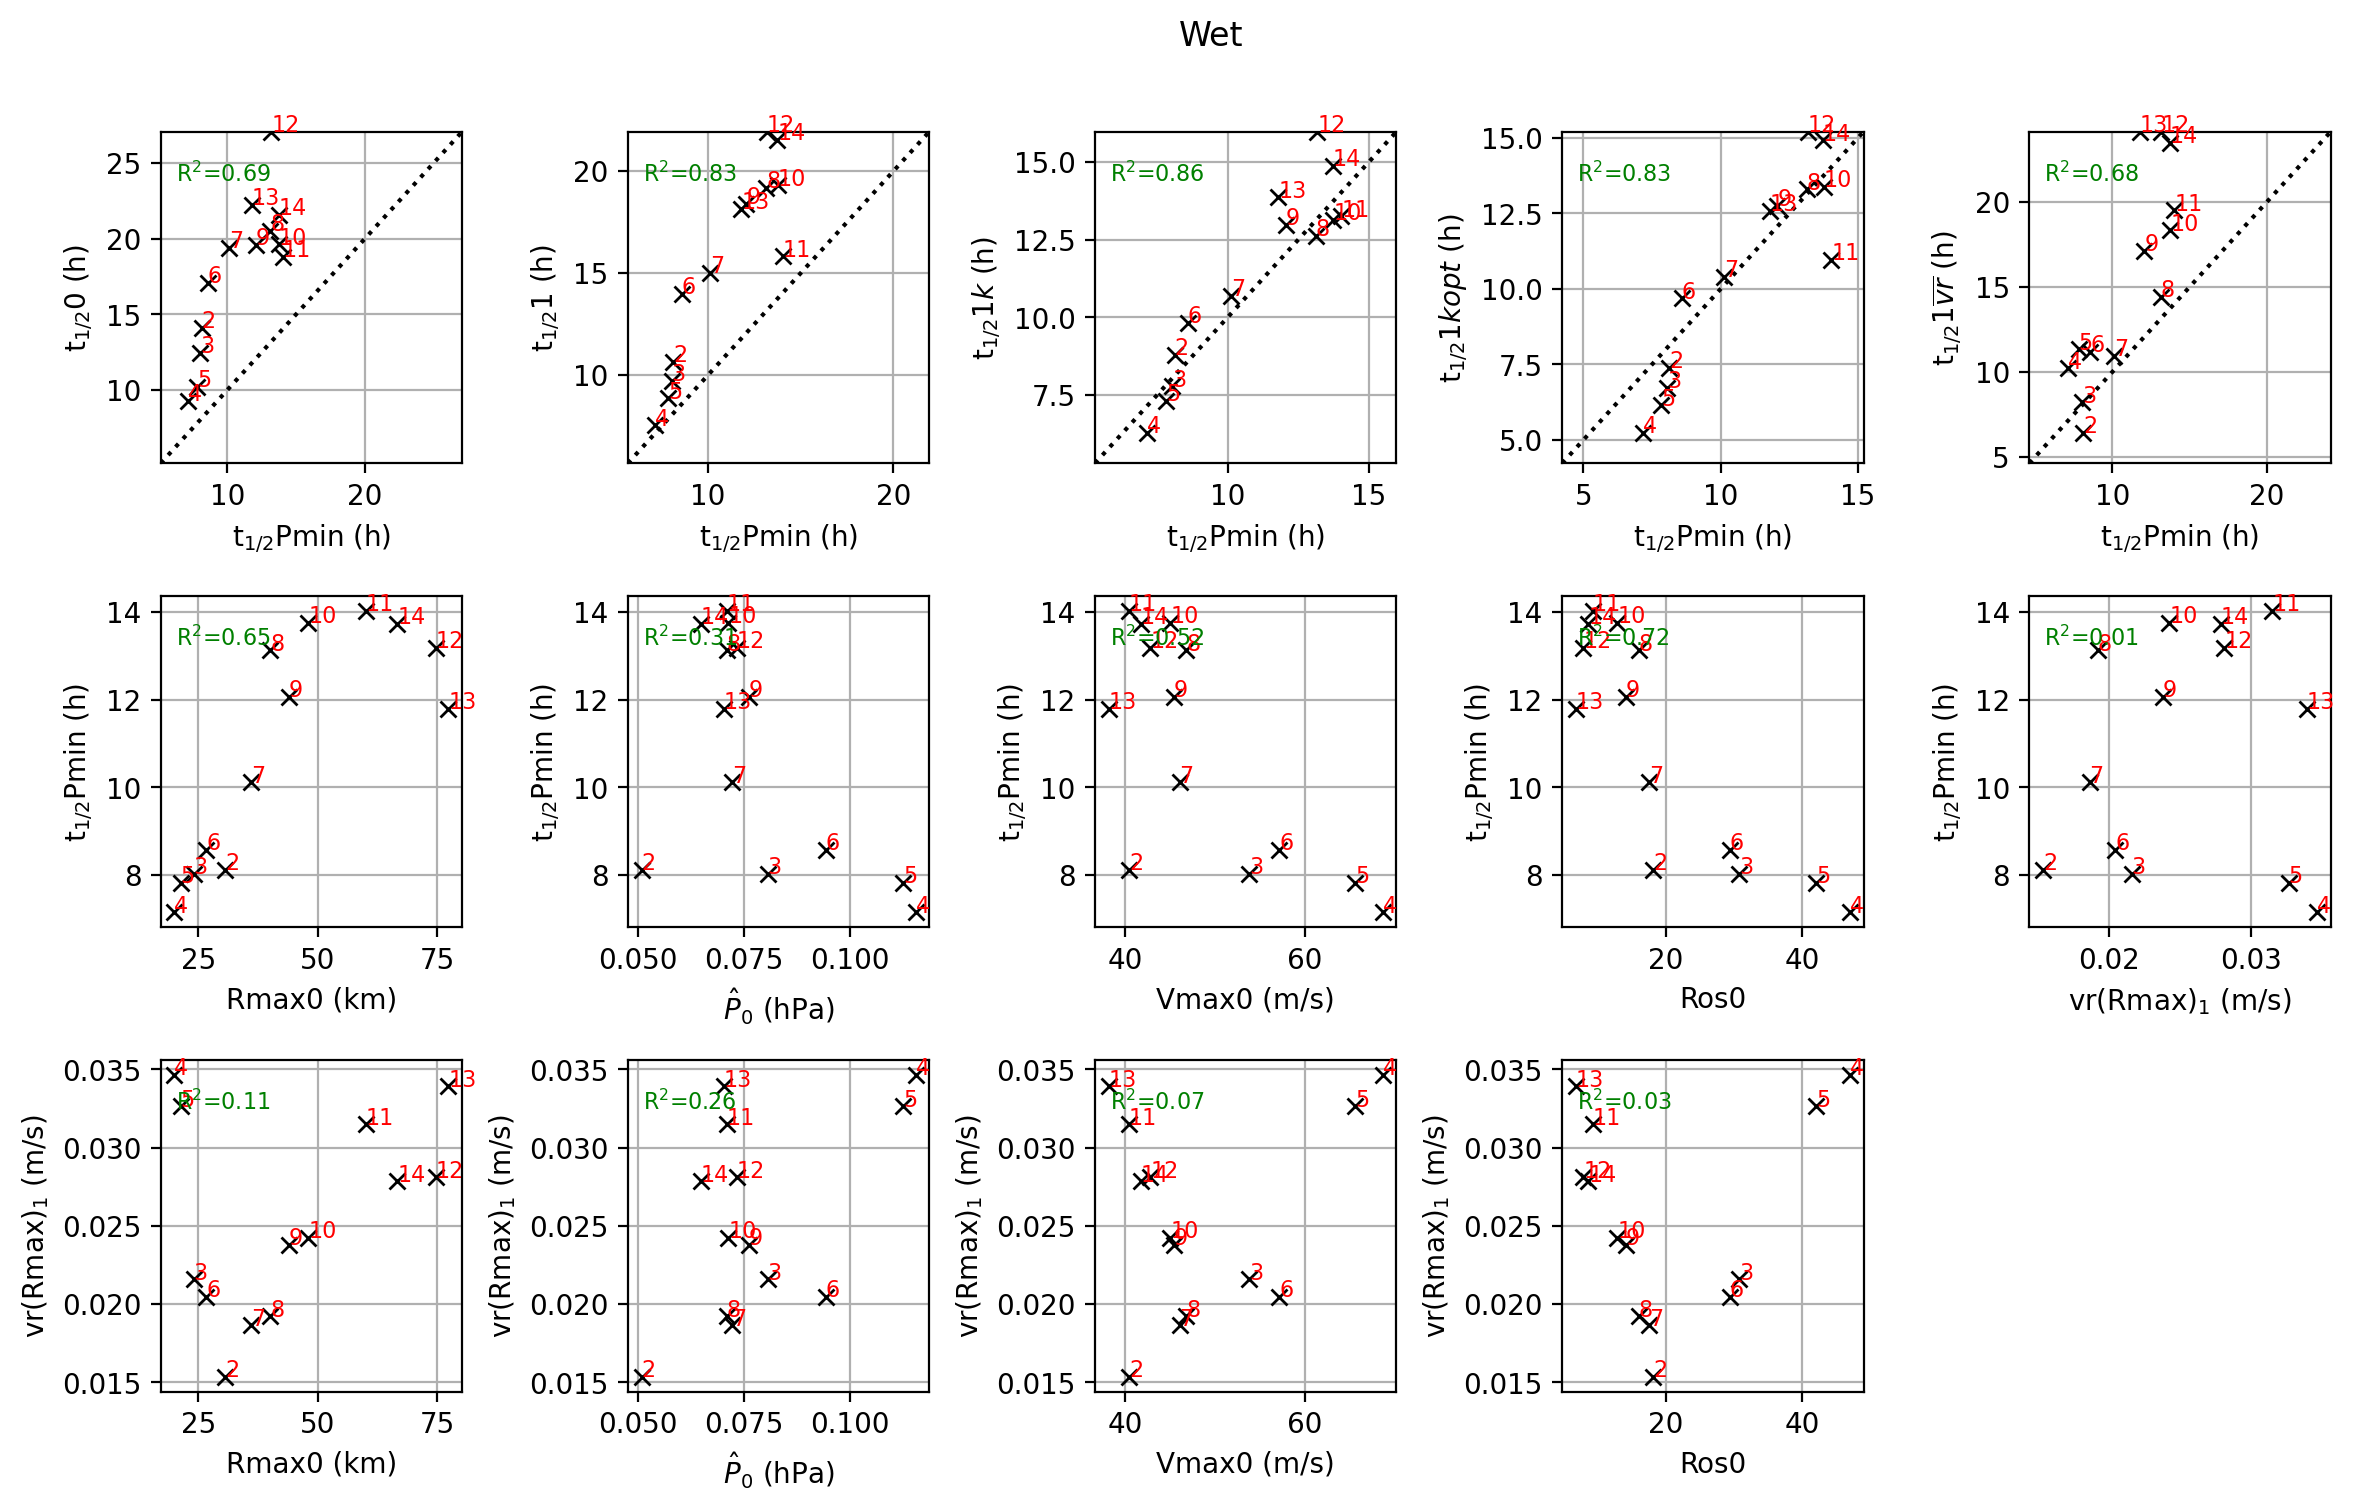

In [11]:
def plot_scat(ax,d):
    ax.plot(d.x.dat,d.y.dat,'xk')
    ax.grid(True)
    ax.set_xlabel(d.x.lab)
    ax.set_ylabel(d.y.lab)
    for tlf,x,y in zip(tlfs,d.x.dat,d.y.dat):
        ax.text(x,y,round(tlf),fontsize=fs,color='r')
    r2=np.corrcoef(d.x.dat,d.y.dat)[0,1]**2
    ax.text(0.05,0.85,"R$^2$={:2.2f}".format(r2),transform=ax.transAxes,fontsize=fs,color='g')
    if d.eq:
        axr=[np.min((d.x.dat,d.y.dat)),np.max((d.x.dat,d.y.dat))]
        axr[0]=axr[0]-0.1*(axr[1]-axr[0])
        axr[1]=axr[1]+0.1*(axr[1]-axr[~0])
        ax.plot(axr,axr,':k')
        ax.set_xlim(axr)
        ax.set_ylim(axr)
        
print('plotting scatters')
fs=8
fig,axs=plt.subplots(3,5,dpi=200,figsize=(14,7))
plt.subplots_adjust(hspace=0.4,wspace=0.55,top=.9,bottom=0)
# for i in range(2,3):
#     axs.flatten()[i].axis('off')
        
pltdats=(
    Pltdat(vd['thP'],vd['tha0'],True),
    Pltdat(vd['thP'],vd['tha1'],True),
    Pltdat(vd['thP'],vd['tha1k'],True),
    Pltdat(vd['thP'],vd['tha1ko'],True),
    Pltdat(vd['thP'],vd['tha1m'],True), 
    
#     Pltdat(vd['Rmax0'],vd['Rmax1'],True),
#     Pltdat(vd['Phat0'],vd['Phat1'],True),
    
    Pltdat(vd['Rmax0'],vd['thP'],False),
    Pltdat(vd['Phat0'],vd['thP'],False),
    Pltdat(vd['Vmax0'],vd['thP'],False),
    Pltdat(vd['Ros0'],vd['thP'],False),
    Pltdat(vd['vrRmax1'],vd['thP'],False),

    Pltdat(vd['Rmax0'],vd['vrRmax1'],False),
    Pltdat(vd['Phat0'],vd['vrRmax1'],False),
    Pltdat(vd['Vmax0'],vd['vrRmax1'],False),
    Pltdat(vd['Ros0'],vd['vrRmax1'],False),  
#     Pltdat(vd['sqrtVmax0'],vd['vrRmax0'],False),
)

# axs=np.delete(axs.flatten(),[2])
for ax,pltdat in zip(axs.flatten(),pltdats):
    plot_scat(ax,pltdat)
plt.suptitle(runstr);
for i in range(len(pltdats),len(axs.flat)):
    axs.flat[i].axis('off')

Getting vars
Calculating half lives
k opt= 1.00001
k mean= 1.217396440614956
plotting time series
Getting vars
Calculating half lives
k opt= 1.6000100000000002
k mean= 1.6903712345635418
plotting time series


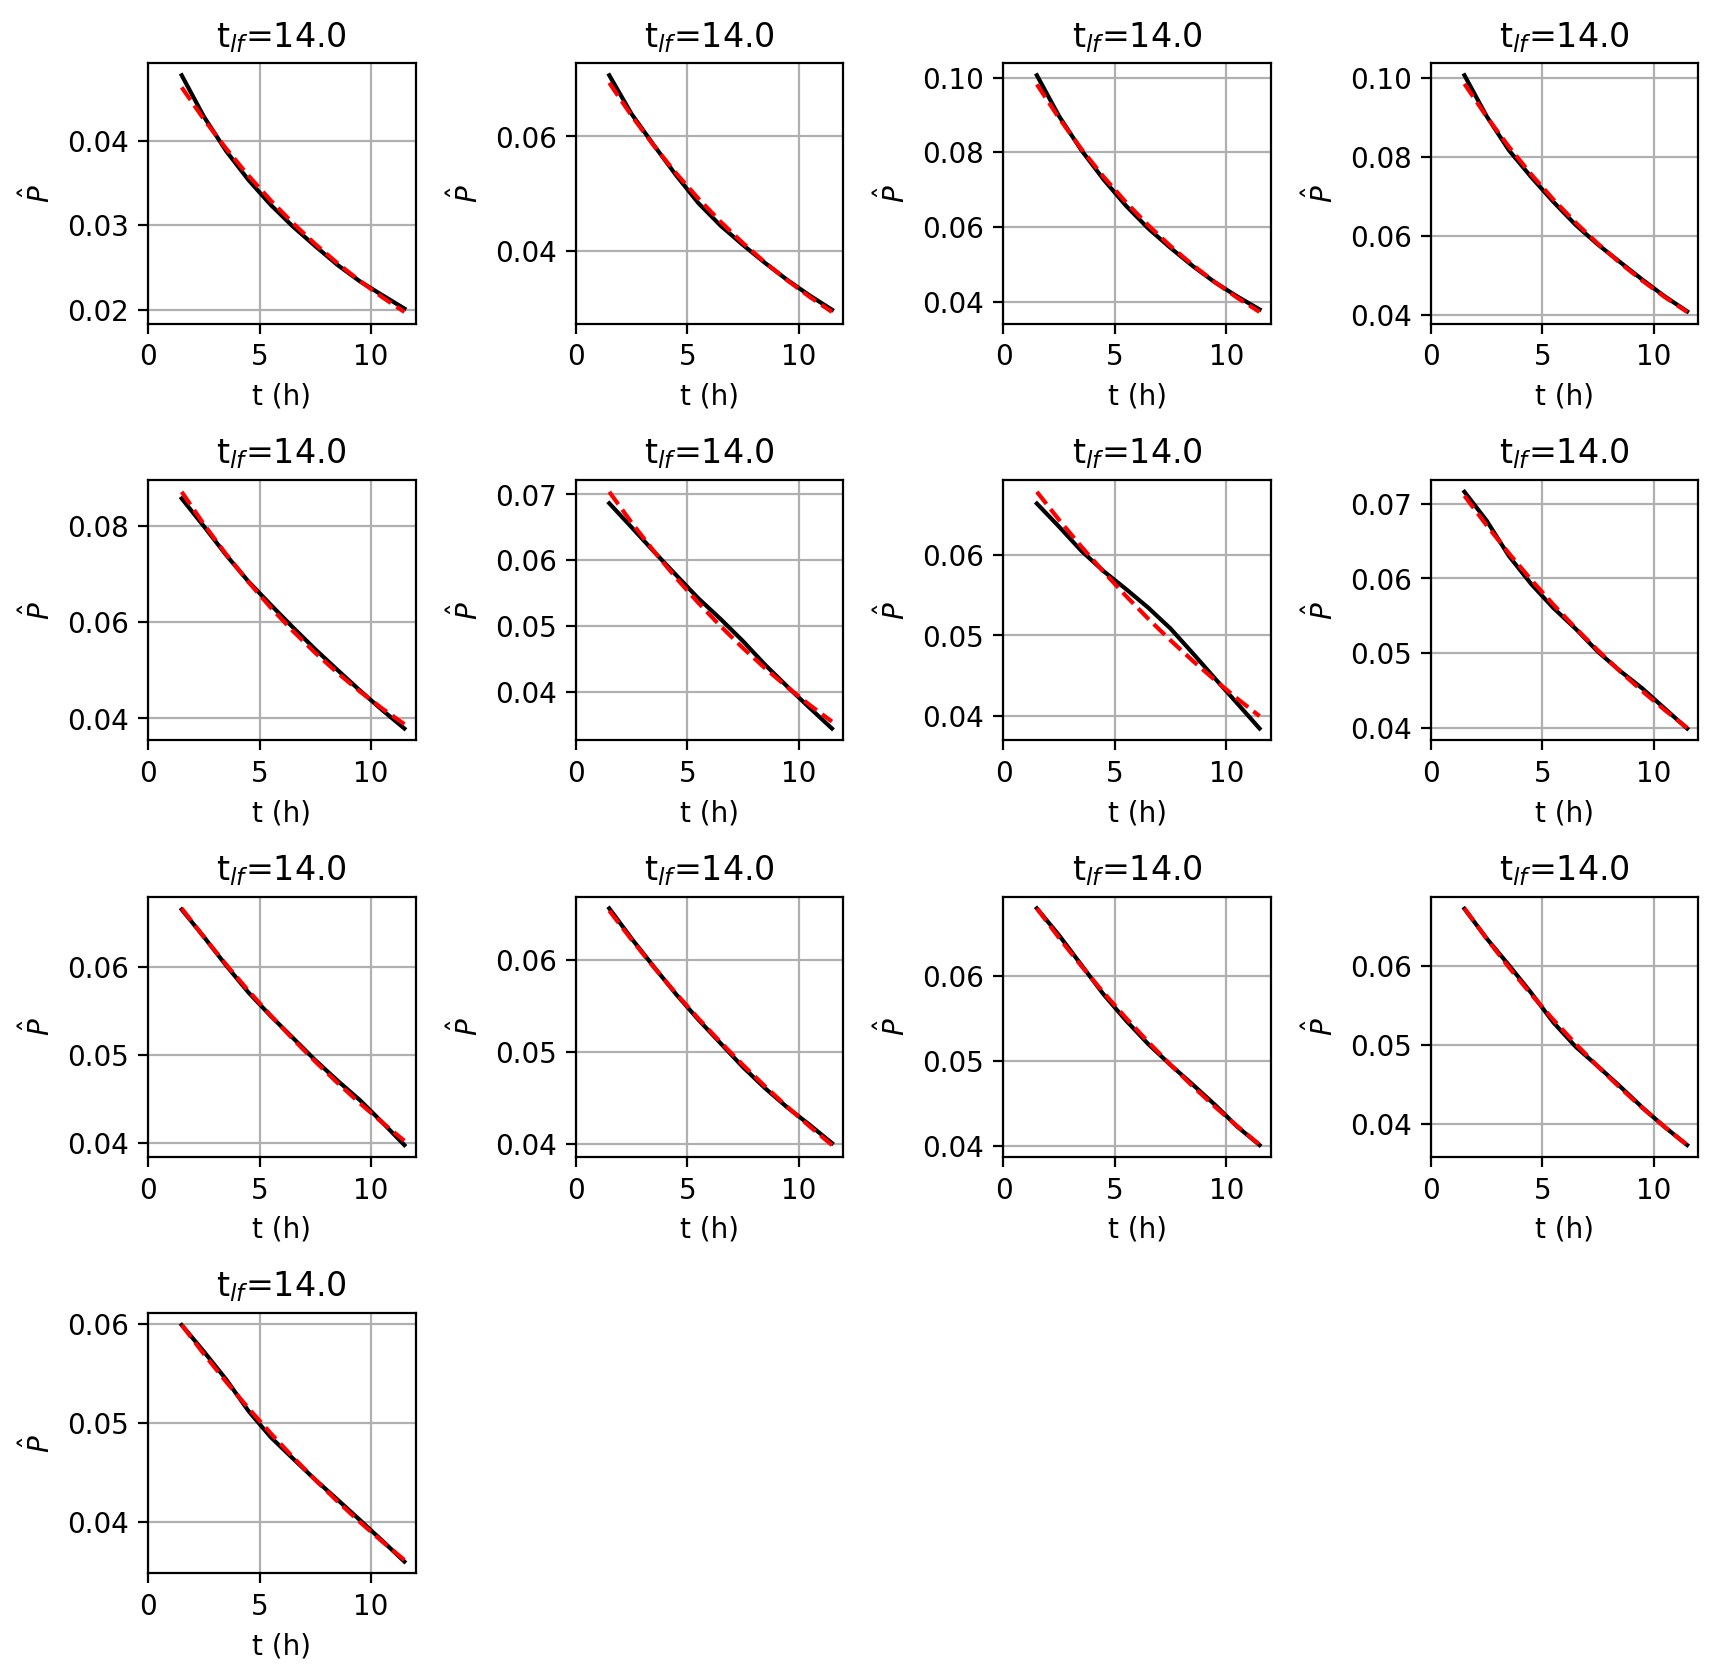

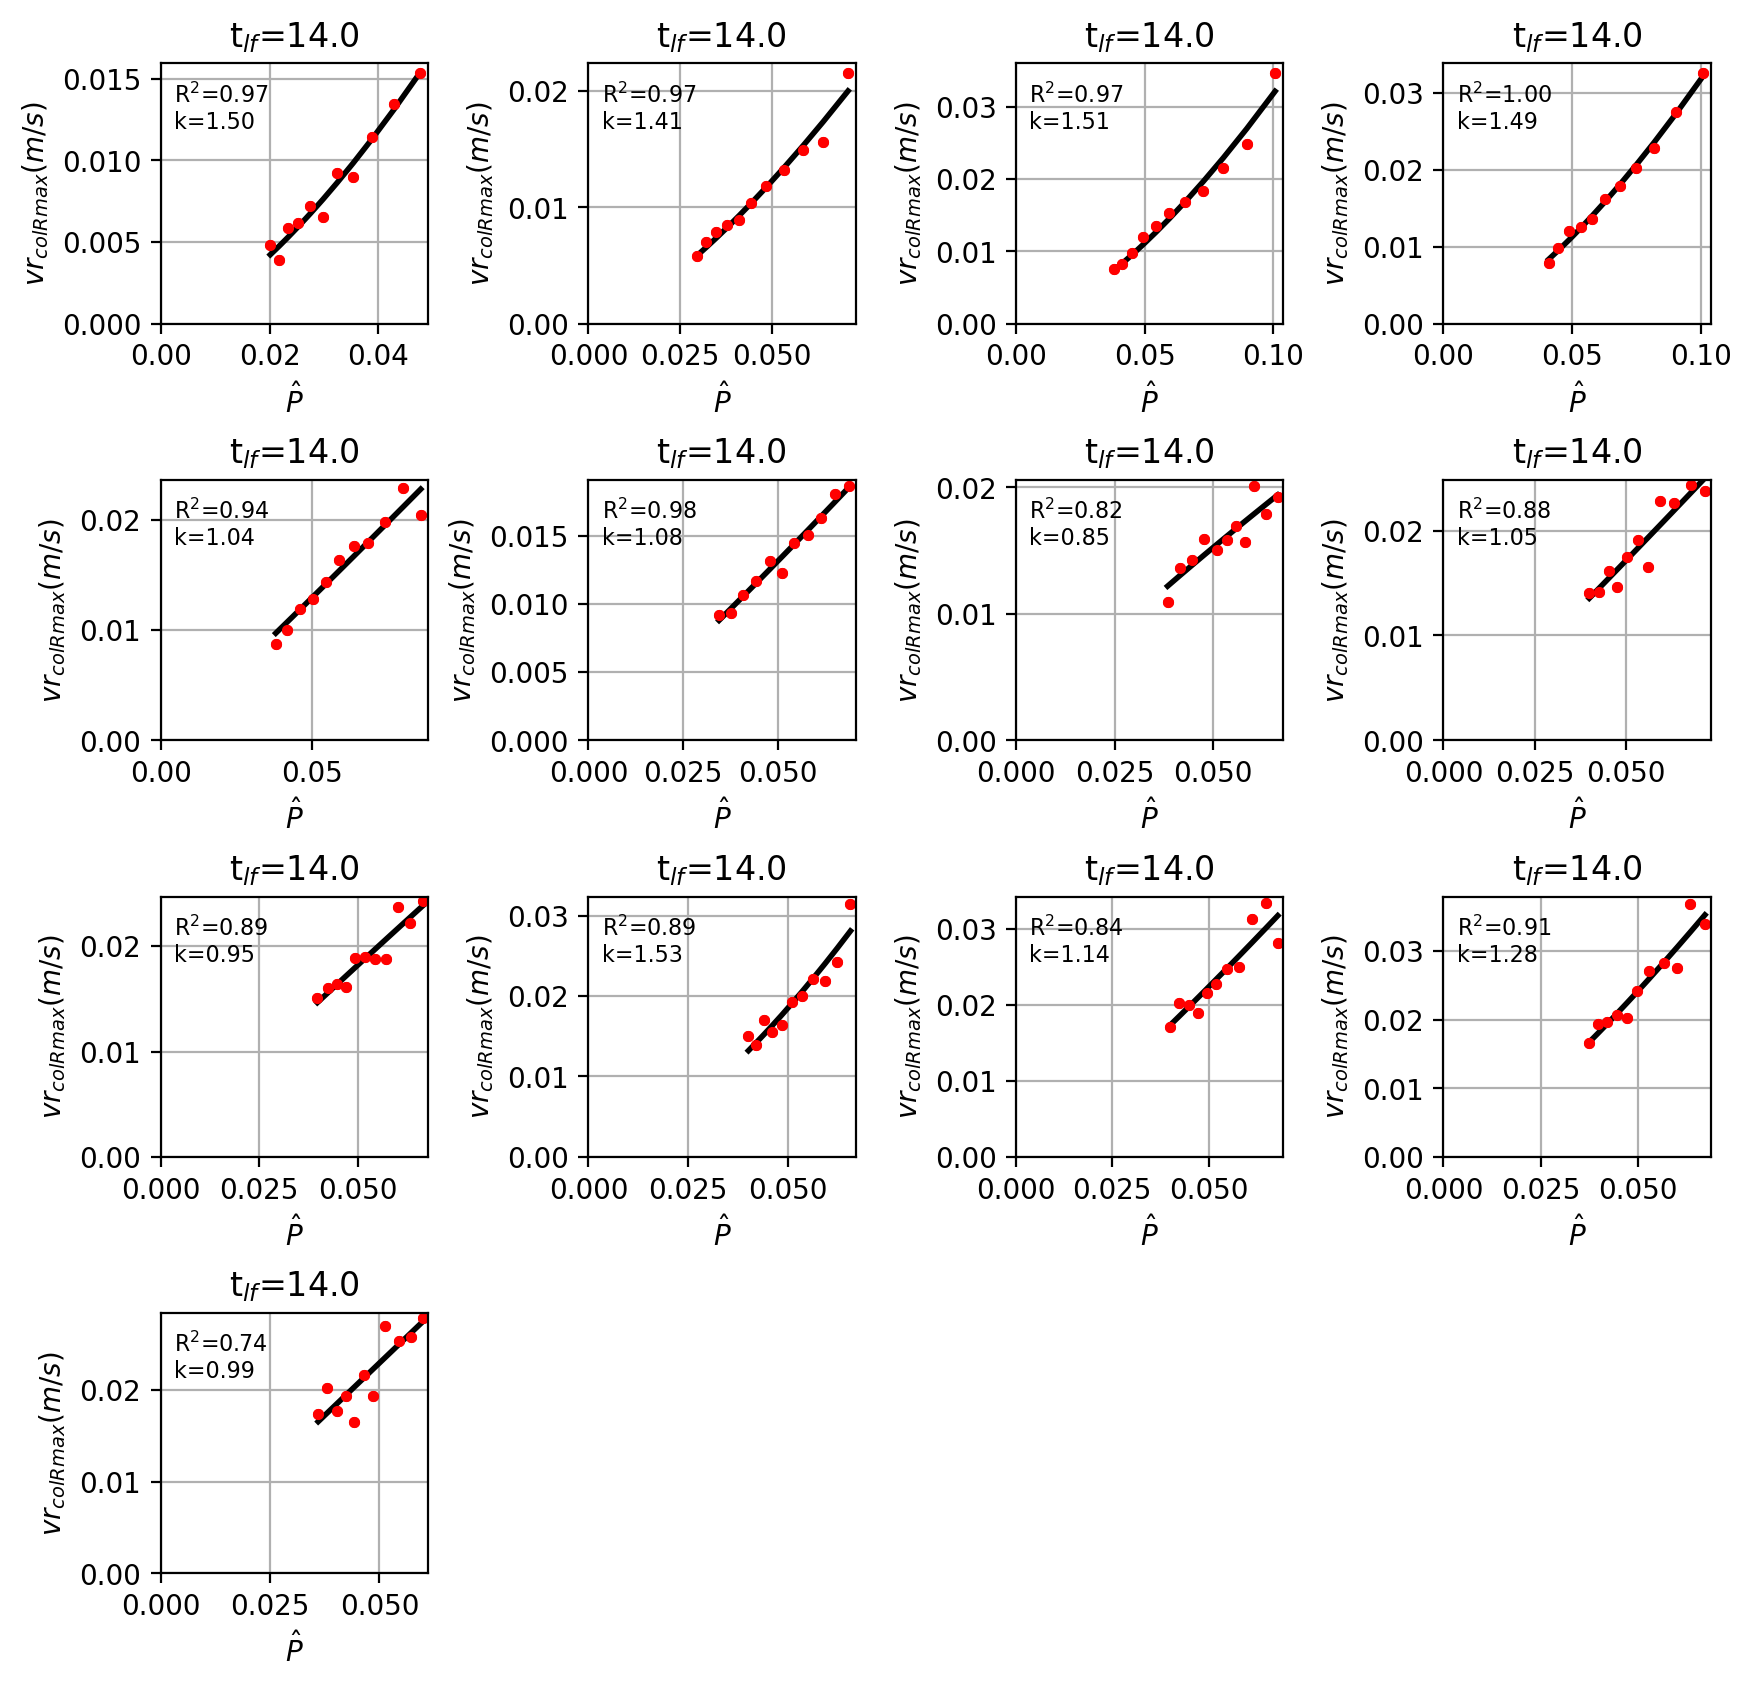

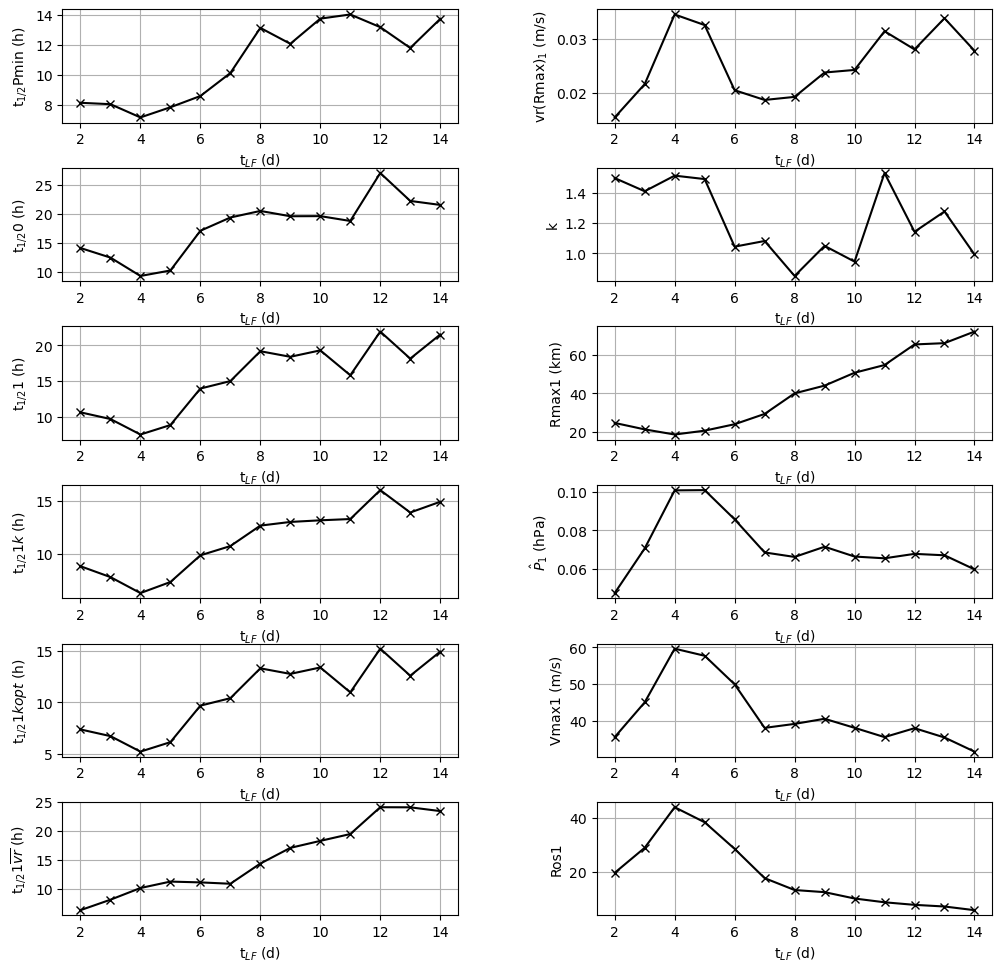

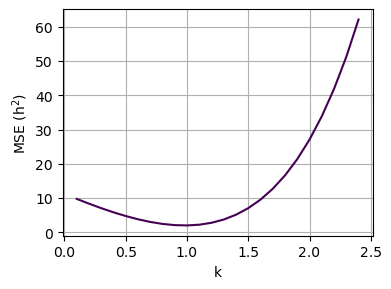

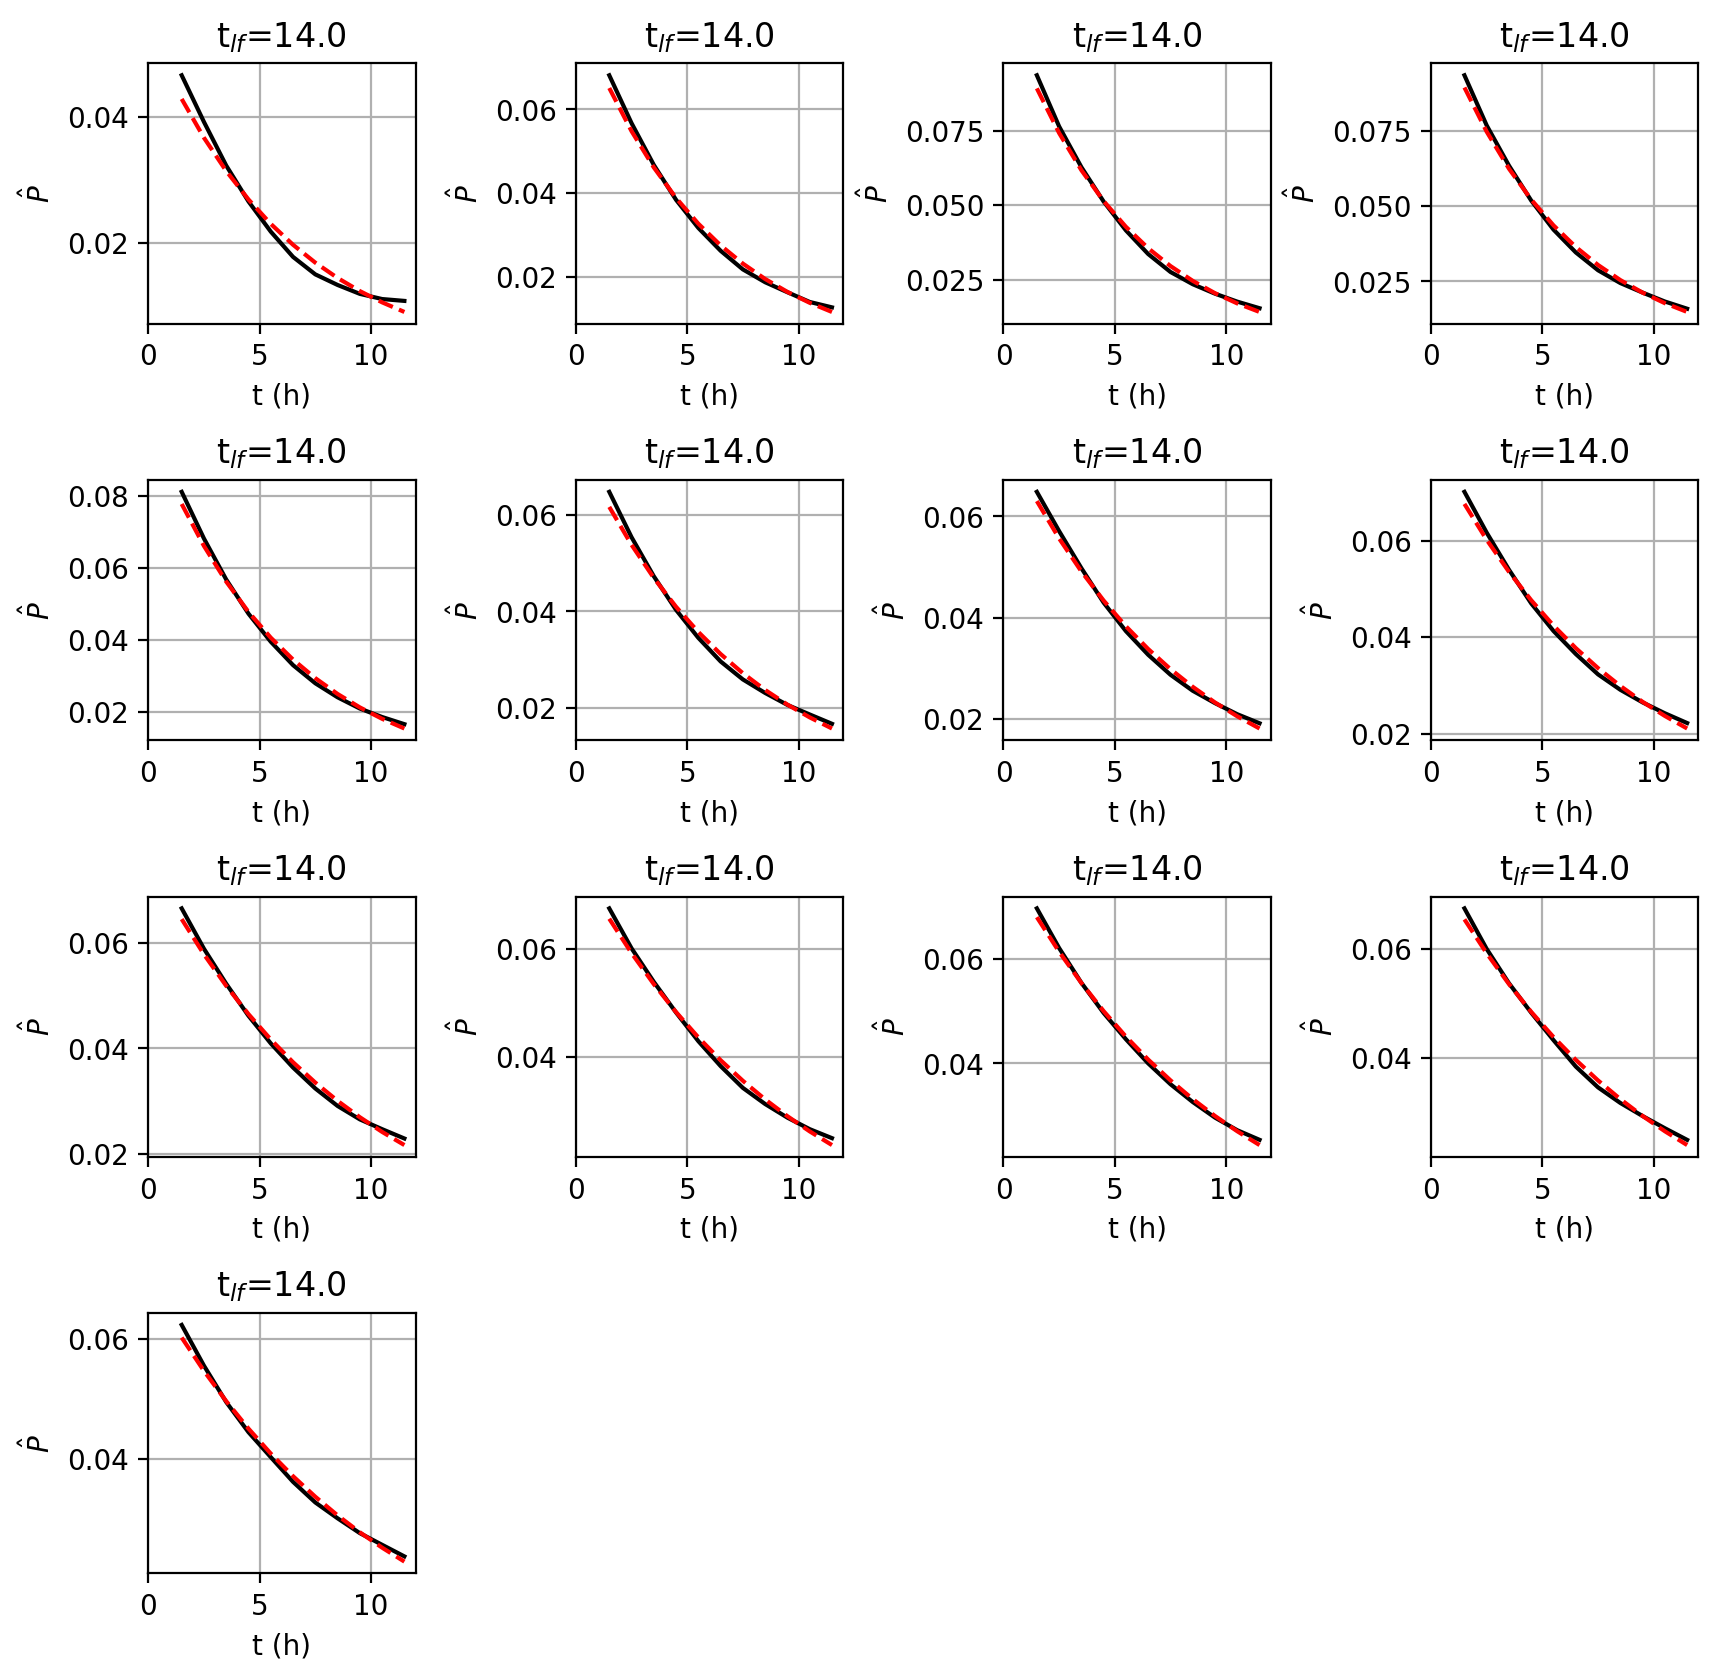

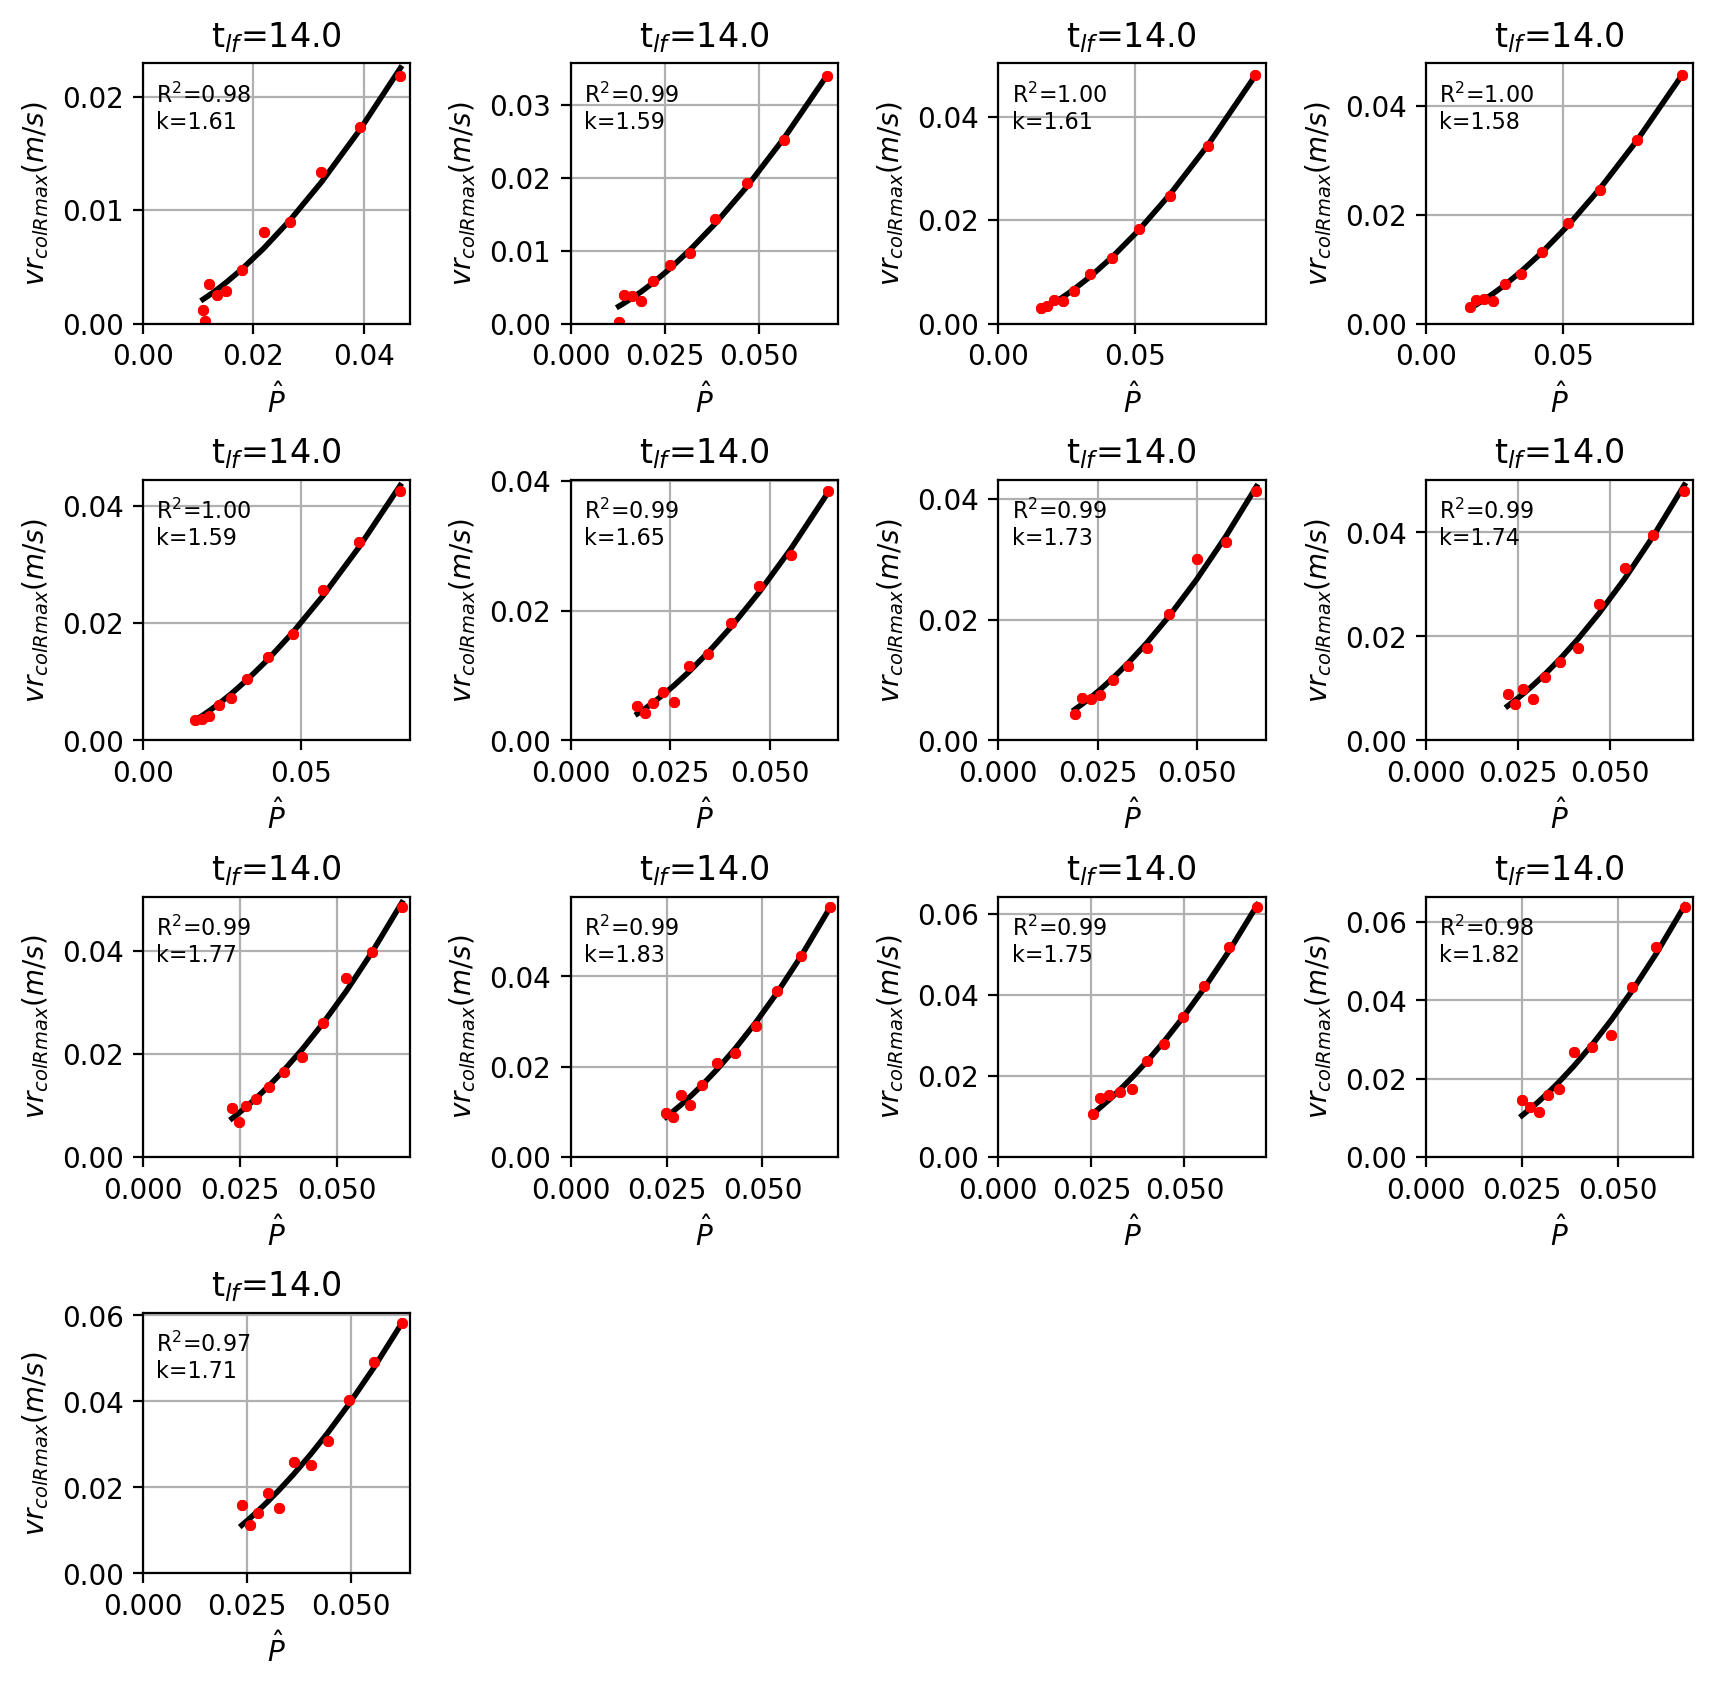

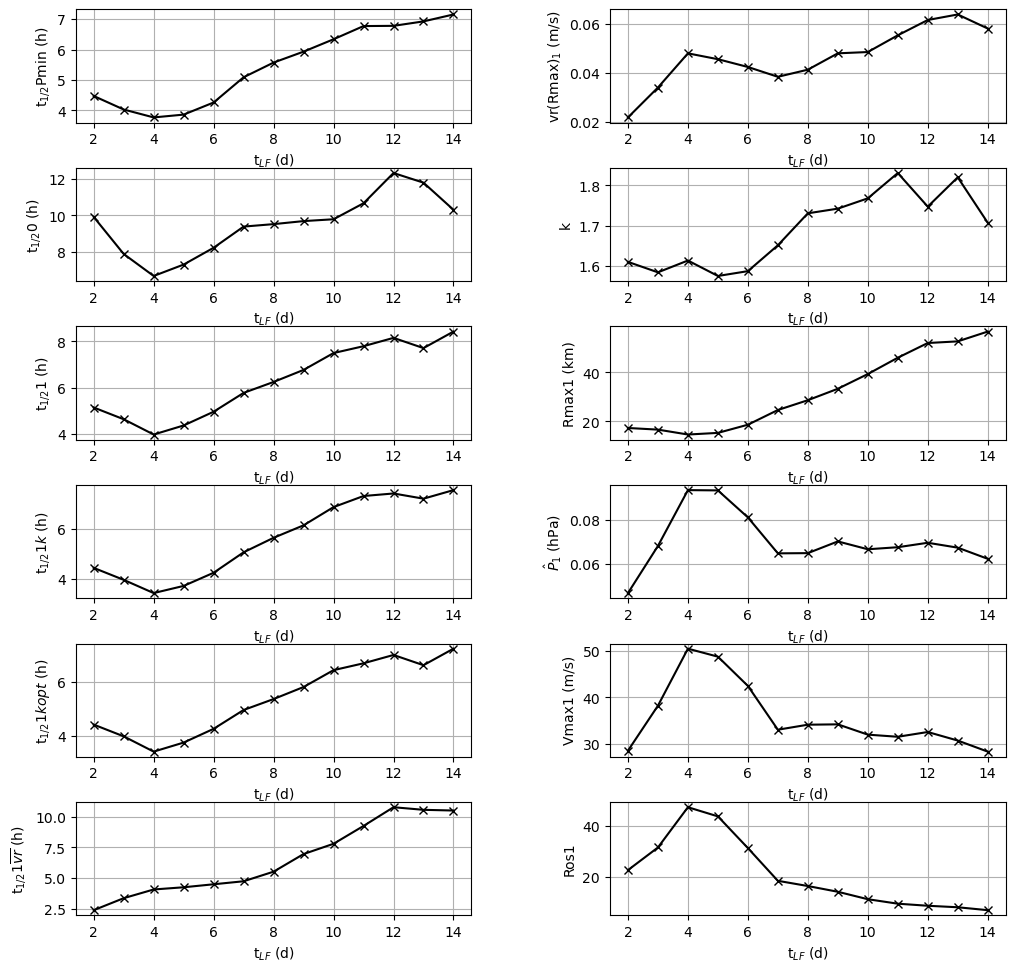

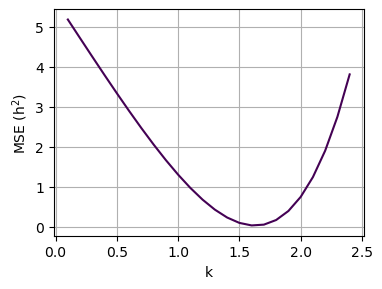

In [14]:
# runstr='Dry'
# dftab=pd.read_pickle('dfs/df_run_02_dry_delta_tab.pkl')
# df=pd.read_pickle('dfs/df_run_02_dry.pkl')

runstr='Wet'
dftab=pd.read_pickle('../dfs/df_run_02_land_delta_tab.pkl')
df=pd.read_pickle('../dfs/df_run_02_land.pkl')

f=2*np.sin(30*(np.pi/180))*7.2921150E-5 #coriolis number
fs=8 #font size
dftab['tal']=round((dftab.t-dftab.tlf)*24,2)
dftab['r']=round(dftab['r'],3)
dftab['rV10max']=round(dftab['rV10max'],3)
r0=dftab.r.unique()[0]

df['tal']=round((df.t-df.tlf)*24,2)

vd_w=get_vd()


runstr='Dry'
dftab=pd.read_pickle('../dfs/df_run_02_dry_delta_tab.pkl')
df=pd.read_pickle('../dfs/df_run_02_dry.pkl')

# runstr='Wet'
# dftab=pd.read_pickle('../dfs/df_run_02_land_delta_tab.pkl')
# df=pd.read_pickle('../dfs/df_run_02_land.pkl')

f=2*np.sin(30*(np.pi/180))*7.2921150E-5 #coriolis number
fs=8 #font size
dftab['tal']=round((dftab.t-dftab.tlf)*24,2)
dftab['r']=round(dftab['r'],3)
dftab['rV10max']=round(dftab['rV10max'],3)
r0=dftab.r.unique()[0]

df['tal']=round((df.t-df.tlf)*24,2)

vd_d=get_vd()



plotting paper scatters


Text(0.5, 1.0, 'Dry')

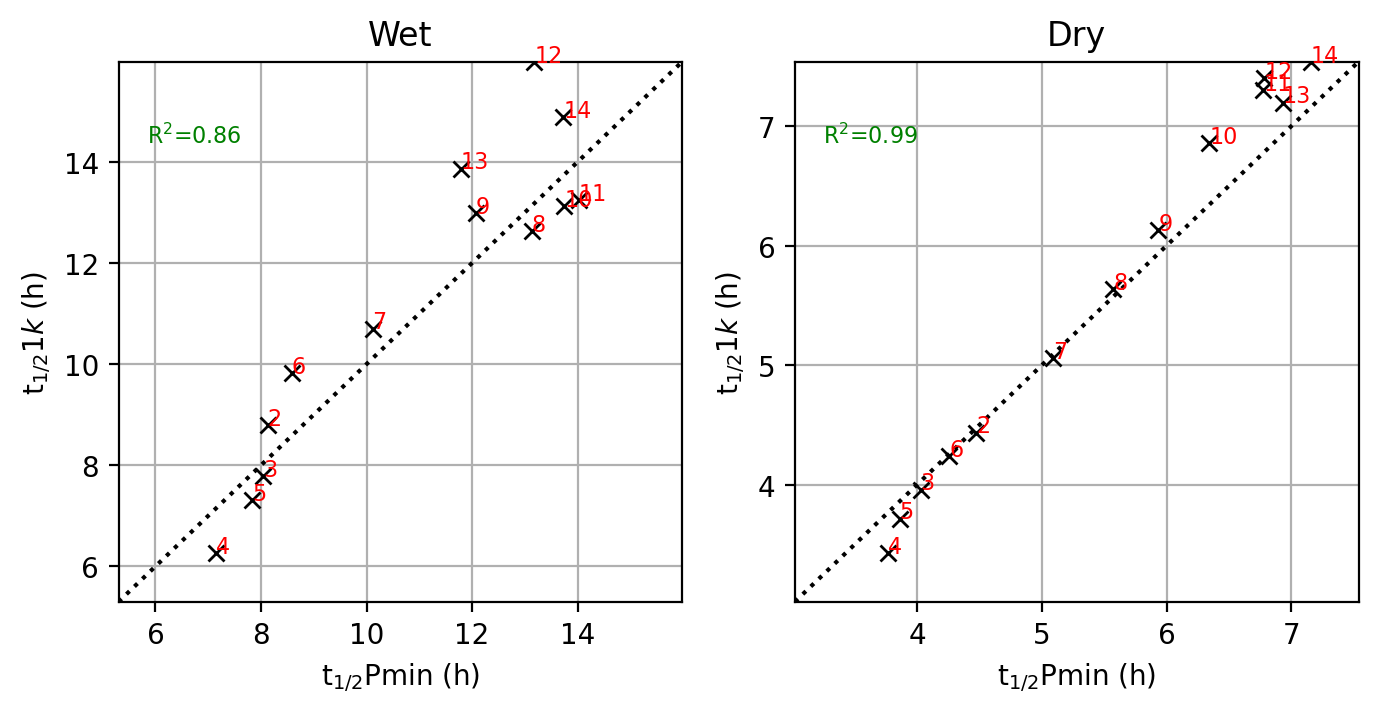

In [24]:
print('plotting paper scatters')
fs=8
fig,axs=plt.subplots(1,2,dpi=200,figsize=(8,3))
plt.subplots_adjust(hspace=0.4,wspace=0.2,top=.9,bottom=0)
# for i in range(2,3):
#     axs.flatten()[i].axis('off')
        
pltdats=(
#     Pltdat(vd['thP'],vd['tha0'],True),
#     Pltdat(vd['thP'],vd['tha1'],True),
#     Pltdat(vd['thP'],vd['tha1k'],True),
    Pltdat(vd_w['thP'],vd_w['tha1k'],True),
    Pltdat(vd_d['thP'],vd_d['tha1k'],True),  
#     Pltdat(vd['thP'],vd['tha1m'],True), 
    
#     Pltdat(vd['Rmax0'],vd['Rmax1'],True),
# #     Pltdat(vd['Phat0'],vd['Phat1'],True),
    
#     Pltdat(vd['Rmax0'],vd['thP'],False),
#     Pltdat(vd['Phat0'],vd['thP'],False),
#     Pltdat(vd['Vmax0'],vd['thP'],False),
#     Pltdat(vd['Ros0'],vd['thP'],False),
#     Pltdat(vd['vrRmax1'],vd['thP'],False),

#     Pltdat(vd['Rmax0'],vd['vrRmax1'],False),
#     Pltdat(vd['Phat0'],vd['vrRmax1'],False),
#     Pltdat(vd['Vmax0'],vd['vrRmax1'],False),
#     Pltdat(vd['Ros0'],vd['vrRmax1'],False),  
#     Pltdat(vd['sqrtVmax0'],vd['vrRmax0'],False),
)

# axs=np.delete(axs.flatten(),[2])
for ax,pltdat in zip(axs.flatten(),pltdats):
    plot_scat(ax,pltdat)
# plt.suptitle(runstr);
for i in range(len(pltdats),len(axs.flat)):
    axs.flat[i].axis('off')
    
axs.flat[0].set_title('Wet')
axs.flat[1].set_title('Dry')